In [7]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import itertools
from scipy import stats
import pandas as pd
import seaborn as sns
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from skbio.stats.composition import ilr
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import MinCovDet, EmpiricalCovariance
from scipy.stats import chi2

from statsmodels.stats.multitest import multipletests

from src.models.outliers import outlier_detection, logratio_outlier_detection, impute_zero_values
from src.visualization.plots import biplot, screeplot, loadingsplot, psuedocontrolcomparisonplot
from src.config import get_interim_dir

In [ ]:
get_interim_dir() + "Adamson_T1_gRNAwise_reduced_repair_outcome_profiles.pkl"

'/Users/colm/repos/MUSICian/data/interim/K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2_gRNAwise_reduced_repair_outcome_profiles.pkl'

In [ ]:
alias = "Adamson_T1"
X_orig = pd.read_pickle(get_interim_dir() + "Adamson_T1_gRNAwise_reduced_repair_outcome_profiles.pkl")
counts = X_orig.sum(axis=1)
X_orig.head()

lumc_category                                                                                        Deletion 0bp microhomology  \
Target     Alias                                       Gene   Transcript Barcode                                                  
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 Actl6a P1P2       ACTL6A_-_179280860.23-P1P2                      6510.0   
                                                                         ACTL6A___179280744.23-P1P2                     41210.0   
                                                                         ACTL6A___179280849.23-P1P2                     37210.0   
                                                       Actr5  P1P2       ACTR5_-_37377127.23-P1P2                       61014.0   
                                                                         ACTR5___37377138.23-P1P2                       80684.0   

lumc_category                                                                                        Deletion 1bp microhomology  \
Target     Alias                                       Gene   Transcript Barcode                                                  
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 Actl6a P1P2       ACTL6A_-_179280860.23-P1P2                     13774.0   
                                                                         ACTL6A___179280744.23-P1P2                     79480.0   
                                                                         ACTL6A___179280849.23-P1P2                     69944.0   
                                                       Actr5  P1P2       ACTR5_-_37377127.23-P1P2                      111246.0   
                                                                         ACTR5___37377138.23-P1P2                      152450.0   

lumc_category                                                                                        Deletion 2bp microhomology  \
Target     Alias                                       Gene   Transcript Barcode                                                  
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 Actl6a P1P2       ACTL6A_-_179280860.23-P1P2                      2008.0   
                                                                         ACTL6A___179280744.23-P1P2                     13364.0   
                                                                         ACTL6A___179280849.23-P1P2                     10244.0   
                                                       Actr5  P1P2       ACTR5_-_37377127.23-P1P2                       13214.0   
                                                                         ACTR5___37377138.23-P1P2                       19936.0   

lumc_category                                                                                        Deletion with insertion  \
Target     Alias                                       Gene   Transcript Barcode                                               
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 Actl6a P1P2       ACTL6A_-_179280860.23-P1P2                   5892.0   
                                                                         ACTL6A___179280744.23-P1P2                  29838.0   
                                                                         ACTL6A___179280849.23-P1P2                  26538.0   
                                                       Actr5  P1P2       ACTR5_-_37377127.23-P1P2                    49610.0   
                                                                         ACTR5___37377138.23-P1P2                    61594.0   

lumc_category                                                                                        Homology Directed Repair  \
Target     Alias                                       Gene   Transcript Barcode                                                
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 Actl6a P1P2       ACTL6A_-_179280860

In [11]:
X_orig.xs("Cdyl", level="Gene")

lumc_category                                                                           Deletion 0bp microhomology  \
Target     Alias                                       Transcript Barcode                                            
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 P1         CDYL_-_4776677.23-P1                     51600.0   
                                                                  CDYL___4776680.23-P1                    109704.0   
                                                                  CDYL___4777011.23-P1                    110248.0   
                                                       P2         CDYL_-_4773285.23-P2                     85404.0   
                                                                  CDYL_-_4773412.23-P2                     89058.0   
                                                                  CDYL___4773335.23-P2                    104150.0   

lumc_category                                                                           Deletion 1bp microhomology  \
Target     Alias                                       Transcript Barcode                                            
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 P1         CDYL_-_4776677.23-P1                    103408.0   
                                                                  CDYL___4776680.23-P1                    203292.0   
                                                                  CDYL___4777011.23-P1                    217480.0   
                                                       P2         CDYL_-_4773285.23-P2                    168104.0   
                                                                  CDYL_-_4773412.23-P2                    170688.0   
                                                                  CDYL___4773335.23-P2                    196932.0   

lumc_category                                                                           Deletion 2bp microhomology  \
Target     Alias                                       Transcript Barcode                                            
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 P1         CDYL_-_4776677.23-P1                     17306.0   
                                                                  CDYL___4776680.23-P1                     34050.0   
                                                                  CDYL___4777011.23-P1                     33974.0   
                                                       P2         CDYL_-_4773285.23-P2                     27272.0   
                                                                  CDYL_-_4773412.23-P2                     31400.0   
                                                                  CDYL___4773335.23-P2                     34726.0   

lumc_category                                                                           Deletion with insertion  \
Target     Alias                                       Transcript Barcode                                         
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 P1         CDYL_-_4776677.23-P1                  45676.0   
                                                                  CDYL___4776680.23-P1                  89678.0   
                                                                  CDYL___4777011.23-P1                  90492.0   
                                                       P2         CDYL_-_4773285.23-P2                  70326.0   
                                                                  CDYL_-_4773412.23-P2                  70314.0   
                                                                  CDYL___4773335.23-P2                  87450.0   

lumc_category                                                                           Homology Directed Repair  \
Target     Alias                                       Transcript Barcode                                          
Adamson_T1 K

In [12]:
X_orig.index.get_level_values("Gene").unique().shape[0]

468

In [13]:
X_orig.index.get_level_values("Gene").value_counts()

Gene
Non       60
Cdyl       6
Pif1       6
Arid1b     6
Kat8       6
          ..
Gtf2h4     3
Gtf2h3     3
Zranb3     3
Mbd3       2
Baz1b      2
Name: count, Length: 468, dtype: int64

In [14]:
X = pd.read_pickle(get_interim_dir() + "{}_gRNAwise_reduced_repair_outcome_profiles.pkl".format(alias))

idx = X.index.to_frame().reset_index(drop=True)
idx.loc[idx["Gene"] == "Non", "Gene"] = idx.loc[idx["Gene"] == "Non", "Barcode"]

X.index = pd.MultiIndex.from_frame(idx)

# adamson dataset has multiple "transcripts" for some genes. Remove the duplicates, as I am not sure what impact these "transcripts" have or if its a good idea to aggregate them together
transcripts = {}
for i, r in X.reset_index()[["Gene", "Transcript"]].iterrows():
    if r["Gene"] not in transcripts:
        transcripts[r["Gene"]] = r["Transcript"]

X = X.loc[X.reset_index().apply(lambda x: x["Transcript"] == transcripts[x["Gene"]], axis=1).to_list(), :].droplevel(3)

X = X.loc[:, (X != 0).any(axis=0)]
print((X>0).sum().sum() / (X.shape[0] * X.shape[1]))

counts = X.sum(axis=1)

X_orig = X
X_orig

0.9993145990404386


lumc_category                                                                             Deletion 0bp microhomology  \
Target     Alias                                       Gene   Barcode                                                  
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 Actl6a ACTL6A_-_179280860.23-P1P2                      6510.0   
                                                              ACTL6A___179280744.23-P1P2                     41210.0   
                                                              ACTL6A___179280849.23-P1P2                     37210.0   
                                                       Actr5  ACTR5_-_37377127.23-P1P2                       61014.0   
                                                              ACTR5___37377138.23-P1P2                       80684.0   
...                                                                                                              ...   
                                                       Znhit1 ZNHIT1_-_100861479.23-P1P2                     84022.0   
                                                              ZNHIT1_-_100861482.23-P1P2                     52116.0   
                                                       Zranb3 ZRANB3_-_136288444.23-P1P2                     99710.0   
                                                              ZRANB3_-_136288748.23-P1P2                     33274.0   
                                                              ZRANB3___136288107.23-P1P2                    125722.0   

lumc_category                                                                             Deletion 1bp microhomology  \
Target     Alias                                       Gene   Barcode                                                  
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 Actl6a ACTL6A_-_179280860.23-P1P2                     13774.0   
                                                              ACTL6A___179280744.23-P1P2                     79480.0   
                                                              ACTL6A___179280849.23-P1P2                     69944.0   
                                                       Actr5  ACTR5_-_37377127.23-P1P2                      111246.0   
                                                              ACTR5___37377138.23-P1P2                      152450.0   
...                                                                                                              ...   
                                                       Znhit1 ZNHIT1_-_100861479.23-P1P2                    169172.0   
                                                              ZNHIT1_-_100861482.23-P1P2                     92992.0   
                                                       Zranb3 ZRANB3_-_136288444.23-P1P2                    193850.0   
                                                              ZRANB3_-_136288748.23-P1P2                     66016.0   
                                                              ZRANB3___136288107.23-P1P2                    236914.0   

lumc_category                                                                             Deletion 2bp microhomology  \
Target     Alias                                       Gene   Barcode                                                  
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 Actl6a ACTL6A_-_179280860.23-P1P2                      2008.0   
                                                              ACTL6A___179280744.23-P1P2                     13364.0   
                                                              ACTL6A___179280849.23-P1P2                     10244.0   
                                                       Actr5  ACTR5_-_37377127.23-P1P2                       13214.0   
                                                              ACTR5___37377138.23-P1P2                       19936.0   
...                                   

In [15]:
# X = X_orig.groupby("Cluster", axis=1).sum()
X = X_orig.groupby("lumc_category", axis=1).sum()
X.head()

/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_65066/3572501812.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  X = X_orig.groupby("lumc_category", axis=1).sum()


lumc_category                                                                             Any Insertion  \
Target     Alias                                       Gene   Barcode                                     
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 Actl6a ACTL6A_-_179280860.23-P1P2         4502.0   
                                                              ACTL6A___179280744.23-P1P2        37554.0   
                                                              ACTL6A___179280849.23-P1P2        36328.0   
                                                       Actr5  ACTR5_-_37377127.23-P1P2          43018.0   
                                                              ACTR5___37377138.23-P1P2          58464.0   

lumc_category                                                                             Deletion 0bp microhomology  \
Target     Alias                                       Gene   Barcode                                                  
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 Actl6a ACTL6A_-_179280860.23-P1P2                      6510.0   
                                                              ACTL6A___179280744.23-P1P2                     41210.0   
                                                              ACTL6A___179280849.23-P1P2                     37210.0   
                                                       Actr5  ACTR5_-_37377127.23-P1P2                       61014.0   
                                                              ACTR5___37377138.23-P1P2                       80684.0   

lumc_category                                                                             Deletion 1bp microhomology  \
Target     Alias                                       Gene   Barcode                                                  
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 Actl6a ACTL6A_-_179280860.23-P1P2                     13774.0   
                                                              ACTL6A___179280744.23-P1P2                     79480.0   
                                                              ACTL6A___179280849.23-P1P2                     69944.0   
                                                       Actr5  ACTR5_-_37377127.23-P1P2                      111246.0   
                                                              ACTR5___37377138.23-P1P2                      152450.0   

lumc_category                                                                             Deletion 2bp microhomology  \
Target     Alias                                       Gene   Barcode                                                  
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 Actl6a ACTL6A_-_179280860.23-P1P2                      2008.0   
                                                              ACTL6A___179280744.23-P1P2                     13364.0   
                                                              ACTL6A___179280849.23-P1P2                     10244.0   
                                                       Actr5  ACTR5_-_37377127.23-P1P2                       13214.0   
                                                              ACTR5___37377138.23-P1P2                       19936.0   

lumc_category                                                                             Deletion 3+bp microhomology  \
Target     Alias                                       Gene   Barcode                                                   
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 Actl6a ACTL6A_-_179280860.23-P1P2                       1378.0   
                                                              ACTL6A___179280744.23-P1P2                       8908.0   
                                                              ACTL6A___179280849.23-P1P2                       5244.0   
                                                       Actr5  ACTR5_-_37377127.23-P1P2                         9902.0   
 

In [16]:
X_psuedo = impute_zero_values(X, 1)
X_psuedo

0.00 of our data is zero


lumc_category                                                                             Any Insertion  \
Target     Alias                                       Gene   Barcode                                     
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 Actl6a ACTL6A_-_179280860.23-P1P2         4502.0   
                                                              ACTL6A___179280744.23-P1P2        37554.0   
                                                              ACTL6A___179280849.23-P1P2        36328.0   
                                                       Actr5  ACTR5_-_37377127.23-P1P2          43018.0   
                                                              ACTR5___37377138.23-P1P2          58464.0   
...                                                                                                 ...   
                                                       Znhit1 ZNHIT1_-_100861479.23-P1P2        57782.0   
                                                              ZNHIT1_-_100861482.23-P1P2        35542.0   
                                                       Zranb3 ZRANB3_-_136288444.23-P1P2        65726.0   
                                                              ZRANB3_-_136288748.23-P1P2        24330.0   
                                                              ZRANB3___136288107.23-P1P2        81494.0   

lumc_category                                                                             Deletion 0bp microhomology  \
Target     Alias                                       Gene   Barcode                                                  
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 Actl6a ACTL6A_-_179280860.23-P1P2                      6510.0   
                                                              ACTL6A___179280744.23-P1P2                     41210.0   
                                                              ACTL6A___179280849.23-P1P2                     37210.0   
                                                       Actr5  ACTR5_-_37377127.23-P1P2                       61014.0   
                                                              ACTR5___37377138.23-P1P2                       80684.0   
...                                                                                                              ...   
                                                       Znhit1 ZNHIT1_-_100861479.23-P1P2                     84022.0   
                                                              ZNHIT1_-_100861482.23-P1P2                     52116.0   
                                                       Zranb3 ZRANB3_-_136288444.23-P1P2                     99710.0   
                                                              ZRANB3_-_136288748.23-P1P2                     33274.0   
                                                              ZRANB3___136288107.23-P1P2                    125722.0   

lumc_category                                                                             Deletion 1bp microhomology  \
Target     Alias                                       Gene   Barcode                                                  
Adamson_T1 K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2 Actl6a ACTL6A_-_179280860.23-P1P2                     13774.0   
                                                              ACTL6A___179280744.23-P1P2                     79480.0   
                                                              ACTL6A___179280849.23-P1P2                     69944.0   
                                                       Actr5  ACTR5_-_37377127.23-P1P2                      111246.0   
                                                              ACTR5___37377138.23-P1P2                      152450.0   
...                                                                                                              ...   
                                                       Znhit1 ZNHIT1_-_100861479.23-P1P

In [17]:
X = X.div(X.sum(axis=1), axis=0)
columns = X.columns
X = X.groupby(["Gene"]).mean()
X = pd.DataFrame(X.values.tolist(), index=X.index, columns=columns)

In [18]:
X_psuedo = X_psuedo.div(X_psuedo.sum(axis=1), axis=0)
columns = X_psuedo.columns
X_psuedo = X_psuedo.groupby(["Gene"]).apply(stats.gmean)
X_psuedo = pd.DataFrame(X_psuedo.values.tolist(), index=X_psuedo.index, columns=columns)

In [19]:
X = X.iloc[:,np.argsort(stats.gmean(X))]
X_psuedo = X_psuedo.iloc[:,np.argsort(stats.gmean(X_psuedo))]

/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be

[0.41796522 0.669371   0.84627946 0.9242033  0.97109057 1.
 1.        ]


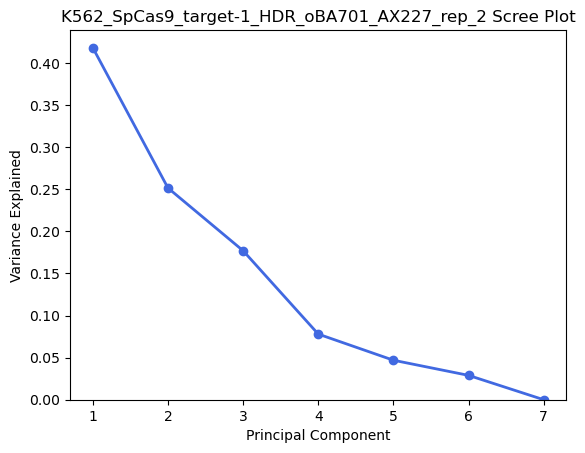

<Figure size 900x600 with 0 Axes>

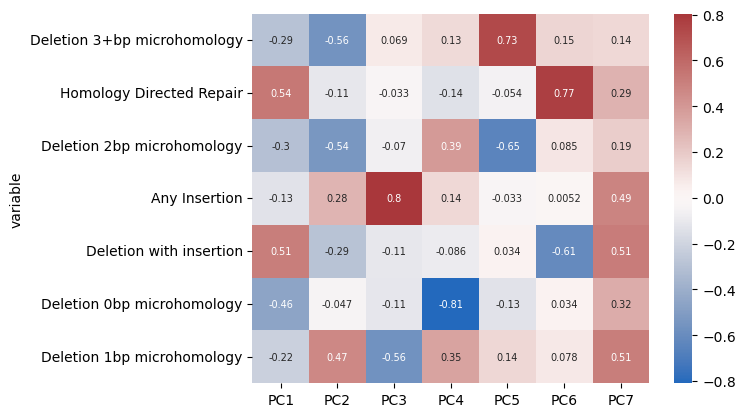

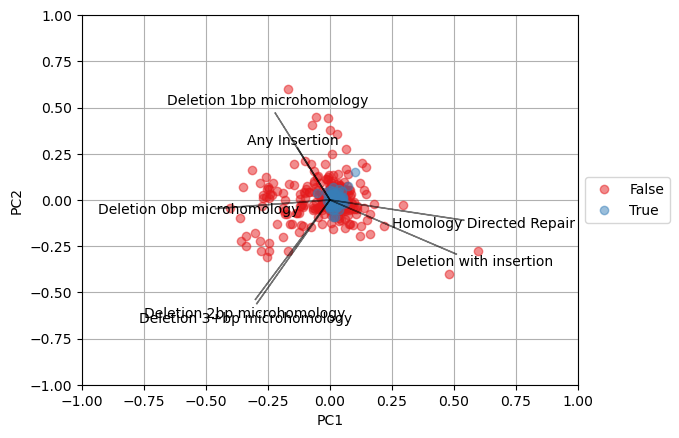

In [20]:
pca_scores, loadings, explained_variance_ratio, distances, pvalues = outlier_detection(X, EmpiricalCovariance())

print(np.cumsum(explained_variance_ratio))

fig, ax = plt.subplots()
screeplot(explained_variance_ratio, ax, alias)
plt.show()

plt.figure(figsize=(9, 6))
loadings_df, _ = loadingsplot(loadings, X.columns.to_list())
plt.show()

#Call the function. Use only the 2 PCs.
pcs_to_analyse = [0, 1]
is_control = X.index.to_series().str.contains("non")
biplot(pca_scores[:,pcs_to_analyse], loadings_df.iloc[:,pcs_to_analyse].values, labels=loadings_df.index, components=loadings_df.iloc[:,pcs_to_analyse].columns, groups=is_control)
plt.show()

/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be

[0.31570928 0.56583834 0.71763244 0.85250208 0.94688022 1.
 1.        ]


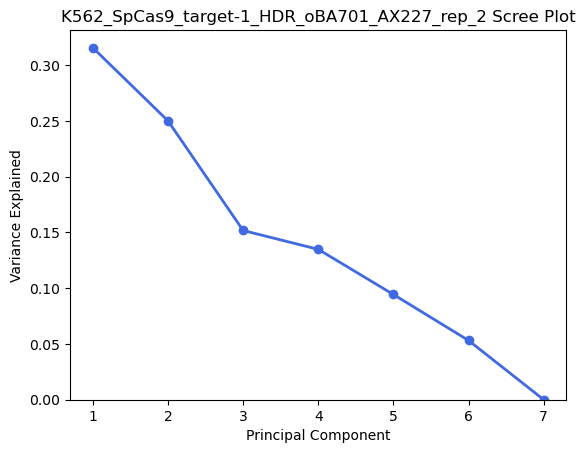

<Figure size 900x600 with 0 Axes>

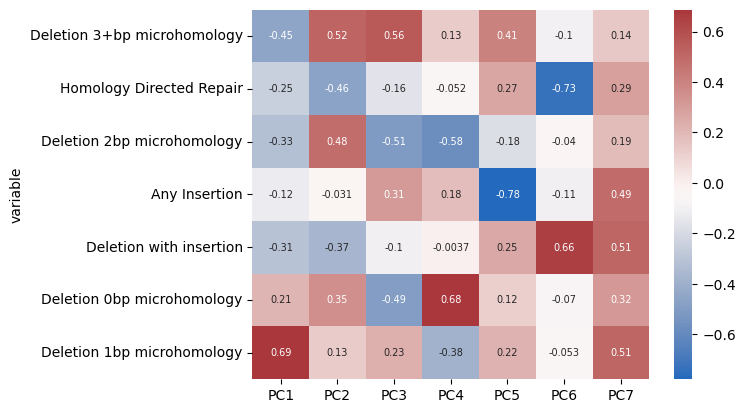

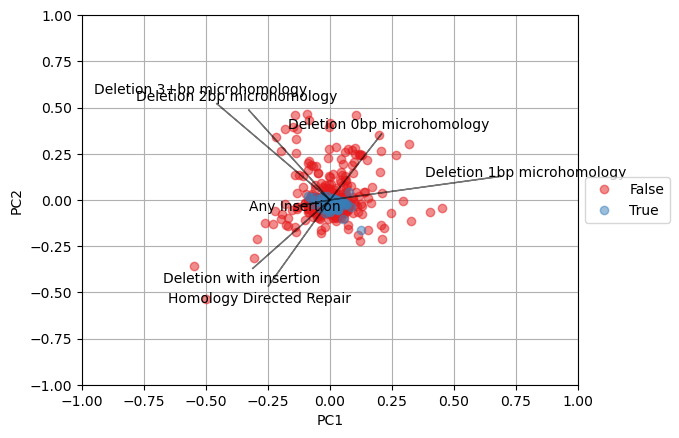

In [21]:
pca_scores, loadings, explained_variance_ratio, distances, pvalues = outlier_detection(X, MinCovDet(random_state=0))

print(np.cumsum(explained_variance_ratio))

fig, ax = plt.subplots()
screeplot(explained_variance_ratio, ax, alias)
plt.show()

plt.figure(figsize=(9, 6))
loadings_df, _ = loadingsplot(loadings, X.columns.to_list())
plt.show()

#Call the function. Use only the 2 PCs.
pcs_to_analyse = [0, 1]
is_control = X.index.to_series().str.contains("non")
biplot(pca_scores[:,pcs_to_analyse], loadings_df.iloc[:,pcs_to_analyse].values, labels=loadings_df.index, components=loadings_df.iloc[:,pcs_to_analyse].columns, groups=is_control)
plt.show()

[0.69820861 0.83817152 0.90524177 0.96055776 0.98923773 1.        ]


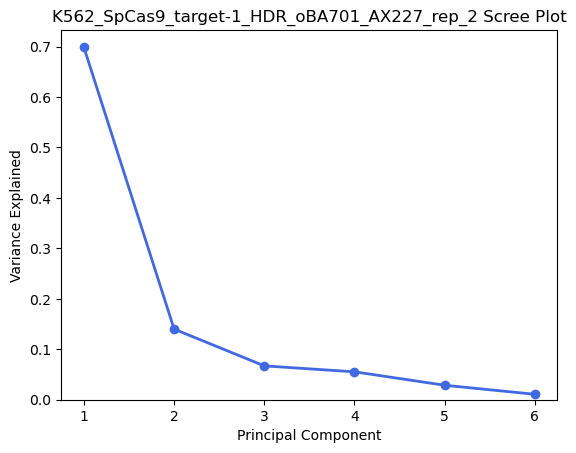

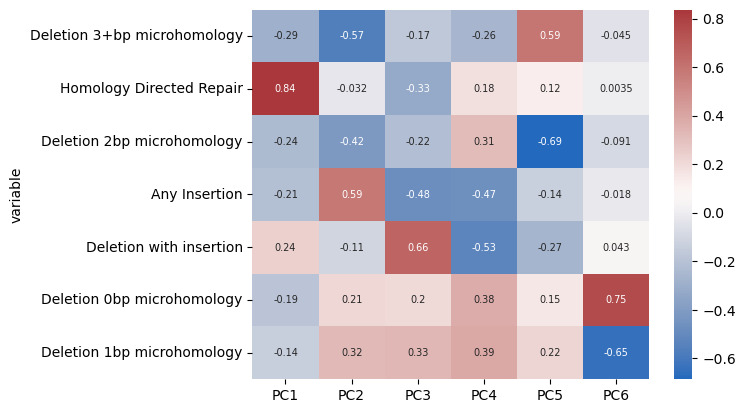

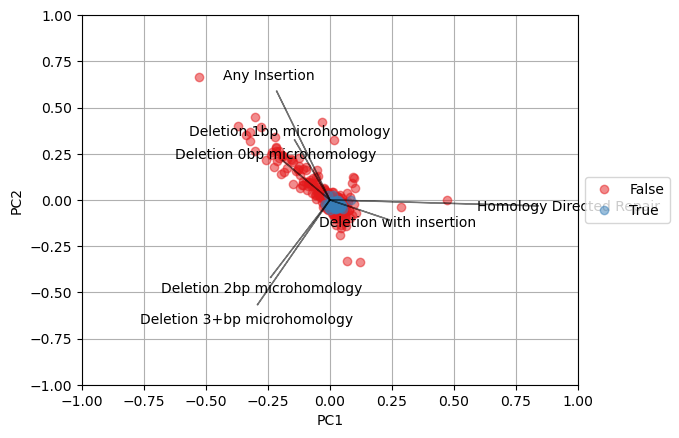

In [22]:
pca_scores, loadings, explained_variance_ratio, _, _ = logratio_outlier_detection(X_psuedo, EmpiricalCovariance())

print(np.cumsum(explained_variance_ratio))

fig, ax = plt.subplots()
screeplot(explained_variance_ratio, ax, alias)
plt.show()

loadings_df, _ = loadingsplot(loadings, X_psuedo.columns.to_list())
plt.show()

#Call the function. Use only the 2 PCs.
pcs_to_analyse = [0,1]
is_control = X_psuedo.index.to_series().str.contains("non")
biplot(pca_scores[:,pcs_to_analyse], loadings_df.iloc[:,pcs_to_analyse].values, labels=loadings_df.index, components=loadings_df.iloc[:,pcs_to_analyse].columns, groups=is_control)
plt.show()

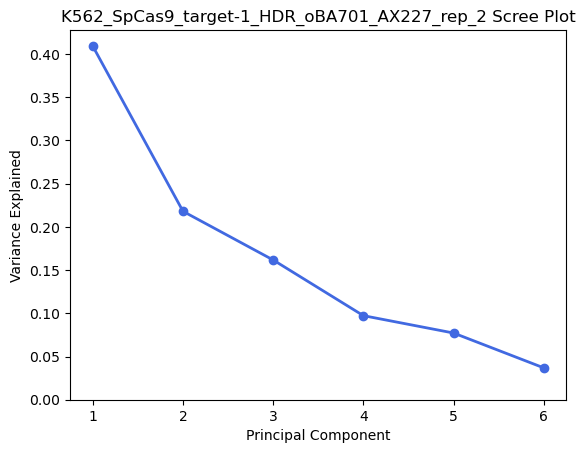

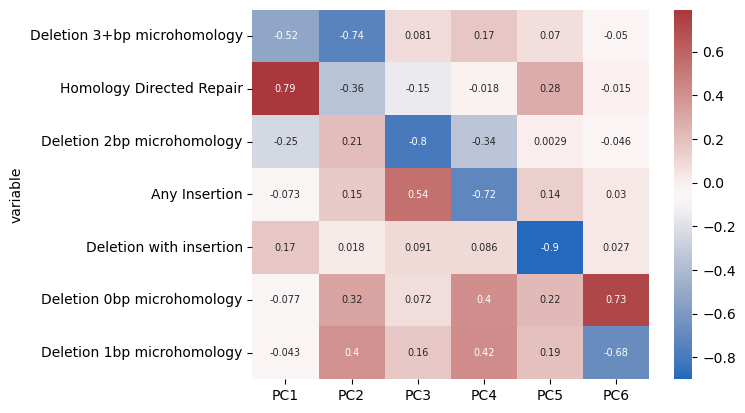

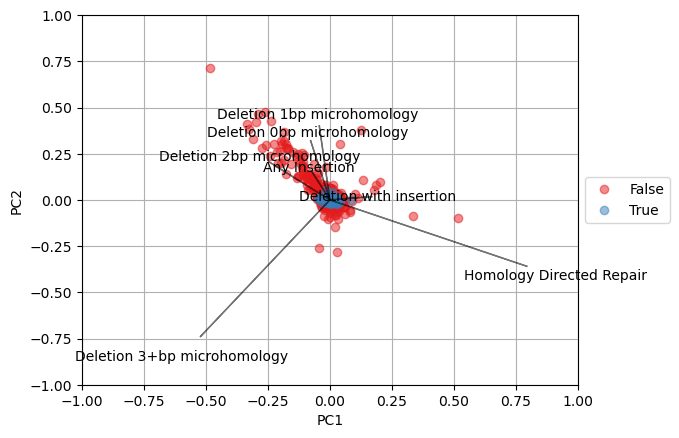

In [23]:
pca_scores, loadings, explained_variance_ratio, distances, pvalues = logratio_outlier_detection(X_psuedo, MinCovDet(random_state=0))

fig, ax = plt.subplots()
screeplot(explained_variance_ratio, ax, alias)
plt.show()

loadings_df, z = loadingsplot(loadings, X_psuedo.columns.to_list())
plt.show()

#Call the function. Use only the 2 PCs.
pcs_to_analyse = [0,1]
is_control = X_psuedo.index.to_series().str.contains("non")
biplot(pca_scores[:,pcs_to_analyse], loadings_df.iloc[:,pcs_to_analyse].values, labels=loadings_df.index, components=loadings_df.iloc[:,pcs_to_analyse].columns, groups=is_control)
plt.show()

In [24]:
results = pd.DataFrame({
    "pvalues": pvalues,
    "dist": distances
}, index=X_psuedo.index).sort_values(by="dist", ascending=False)
corrected = multipletests(results["pvalues"])
results["reject@0.05"] = corrected[0]
results["pvals_corrected@0.05"] = corrected[1]

corrected = multipletests(results["pvalues"], alpha=0.001)
results["reject@0.001"] = corrected[0]
results["pvals_corrected@0.001"] = corrected[1]
results.head(10)

,pvalues,dist,reject@0.05,pvals_corrected@0.05,reject@0.001,pvals_corrected@0.001
Gene,,,,,,
Ccne1,0.0,3195.515975,True,0.0,True,0.0
Helq,0.0,1718.069580,True,0.0,True,0.0
Nabp1,0.0,1458.642244,True,0.0,True,0.0
Rbbp8,0.0,1418.754491,True,0.0,True,0.0
Ssrp1,0.0,1236.434106,True,0.0,True,0.0
Nbn,0.0,898.780422,True,0.0,True,0.0
Rad50,0.0,879.066053,True,0.0,True,0.0
Poll,0.0,799.443268,True,0.0,True,0.0
Atr,0.0,759.566693,True,0.0,True,0.0


In [25]:
print("We find {} significant results with an alpha of 0.05".format(results["reject@0.05"].sum()))
print("We find {} significant results with an alpha of 0.01".format(results["reject@0.001"].sum()))

We find 142 significant results with an alpha of 0.05
We find 122 significant results with an alpha of 0.01


In [26]:
results["rank"] = results.dist.argsort().argsort()
results["is_control"] = results.index.to_series().str.contains("non-target")

/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

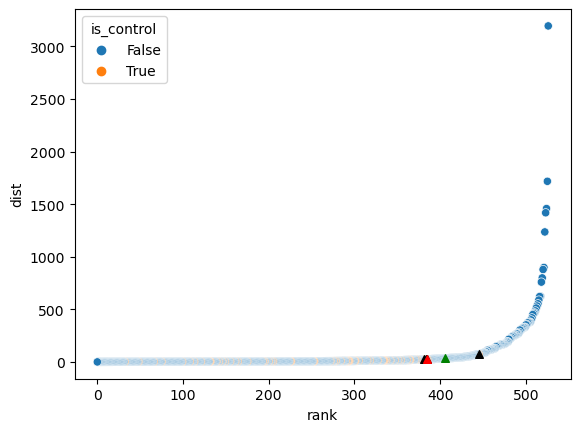

In [27]:
sns.scatterplot(data=results, x="rank", y="dist", hue="is_control")
for i in range(4):
    plt.scatter(x=results[results["is_control"]].iloc[i,:]["rank"], y=results[results["is_control"]].iloc[i,:]["dist"], c="black", s=30, marker='^')

plt.scatter(x=results[results["reject@0.05"]].iloc[-1,:]["rank"], y=results[results["reject@0.05"]].iloc[-1,:]["dist"], c="red", s=30, marker='^')
plt.scatter(x=results[results["reject@0.001"]].iloc[-1,:]["rank"], y=results[results["reject@0.001"]].iloc[-1,:]["dist"], c="green", s=30, marker='^')